# Exploratory Data Analysis for Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

### Dataset with male and female

In [2]:
dt = pd.read_excel("OSA_DB_UPM.xlsx")
df_OSA = pd.DataFrame(dt)

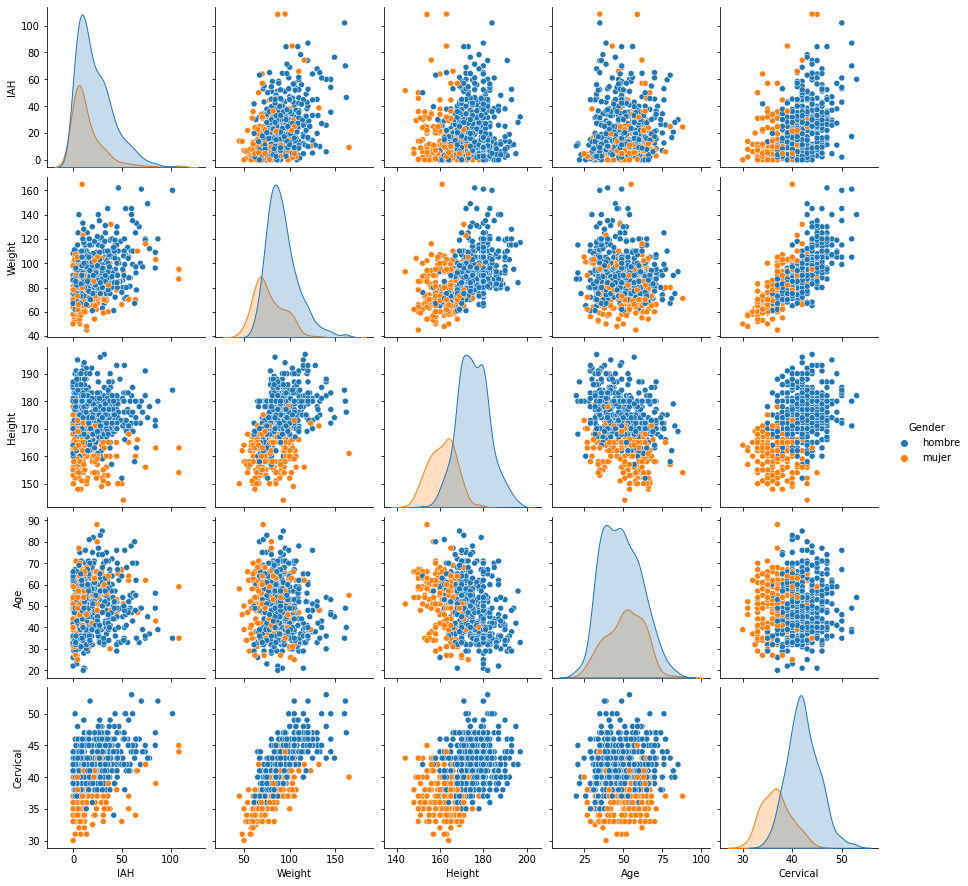

In [3]:
sns.pairplot(df_OSA, hue="Gender")
plt.show()

### Dataset only with male

In [4]:
data = pd.read_excel("OSA_extreme_male.xlsx")
df_OSA_male = pd.DataFrame(data)

In [5]:
df_OSA_male.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0002,hombre,29.6,119,174,56,48,Severe,39.305060
1,P0004,hombre,19.7,78,168,39,42,Severe,27.636054
2,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
3,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
4,P0009,hombre,22.0,72,165,40,42,Severe,26.446281


In [6]:
# Separate the features and labels
x = df_OSA_male[['Patient','Gender','IAH','Weight','Height','Age','Cervical','BMI']]
y = df_OSA_male['OSA']

## Data exploration

In [7]:
df_OSA_male.describe()

,IAH,Weight,Height,Age,Cervical,BMI
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,12.642767,88.572327,175.377358,47.836478,41.575472,28.794656
std,8.344911,14.479817,7.359347,12.715213,2.902022,4.330792
min,0.000000,61.000000,160.000000,20.000000,35.000000,20.061728
25%,5.425000,79.000000,170.000000,38.000000,40.000000,25.780897
50%,11.250000,86.000000,175.000000,47.000000,41.000000,27.991677
75%,19.225000,96.000000,180.000000,58.000000,43.000000,31.215405
max,29.900000,140.000000,196.000000,85.000000,52.000000,43.428571


In [8]:
df_OSA_male['OSA'].value_counts()

Severe     177
Healthy    141
Name: OSA, dtype: int64

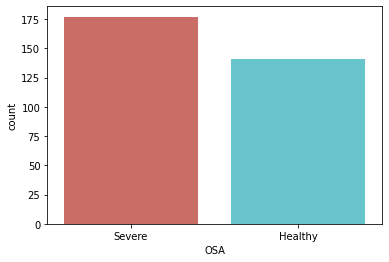

In [9]:
sns.countplot(x = 'OSA', data = df_OSA_male, palette = 'hls')
plt.show()

In [10]:
count_healthy = len(data[data['OSA'] == 'Healthy'])
count_severe = len(data[data['OSA'] == 'Severe'])
pct_of_healthy = count_healthy/(count_healthy+count_severe)
print("Percentage of healthy is:", pct_of_healthy*100)
pct_of_severe = count_severe/(count_healthy+count_severe)
print("Percentage of severe is:", pct_of_severe*100)

Percentage of healthy is: 44.339622641509436
Percentage of severe is: 55.660377358490564


In [11]:
df_OSA_male.groupby('OSA').mean()

,IAH,Weight,Height,Age,Cervical,BMI
OSA,,,,,,
Healthy,5.031915,86.000000,175.851064,44.000000,40.836879,27.799315
Severe,18.705650,90.621469,175.000000,50.892655,42.163842,29.587554


In [12]:
df_OSA_male.groupby('OSA')['OSA'].describe()

,count,unique,top,freq
OSA,,,,
Healthy,141,1,Healthy,141
Severe,177,1,Severe,177


In [13]:
df_OSA_male.groupby('OSA')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
OSA,,,,,,,,
Healthy,141.0,27.799315,4.029647,20.619254,24.913495,26.813590,30.094730,43.428571
Severe,177.0,29.587554,4.408980,20.061728,26.446281,28.680111,32.388355,42.938301


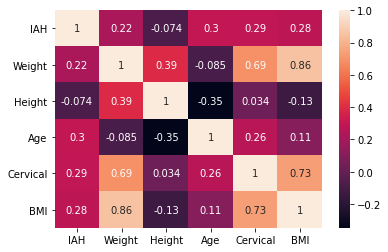

In [14]:
sns.heatmap(df_OSA_male[['IAH', 'Weight', 'Height', 'Age', 'Cervical', 'BMI']].corr(), annot=True)
plt.show()

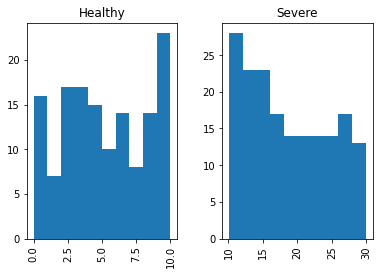

In [15]:
df_OSA_male['IAH'].hist(by=df_OSA_male['OSA'])
plt.show()

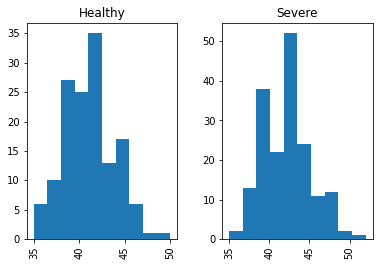

In [16]:
df_OSA_male['Cervical'].hist(by=df_OSA_male['OSA'])
plt.show()

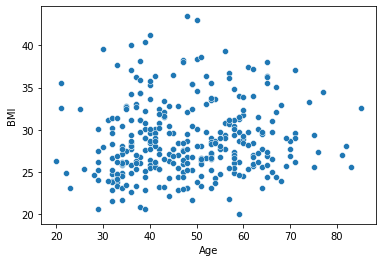

In [17]:
# Scatter plots
sns.scatterplot(data = df_OSA_male, x = df_OSA_male['Age'], y = df_OSA_male['BMI'])
plt.show()

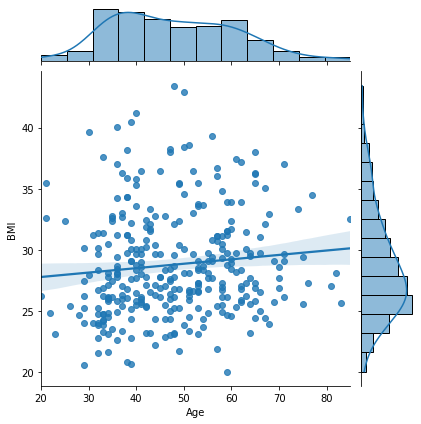

In [18]:
# Regression plot
sns.jointplot(x = df_OSA_male['Age'], y = df_OSA_male['BMI'], kind = "reg")
plt.show()

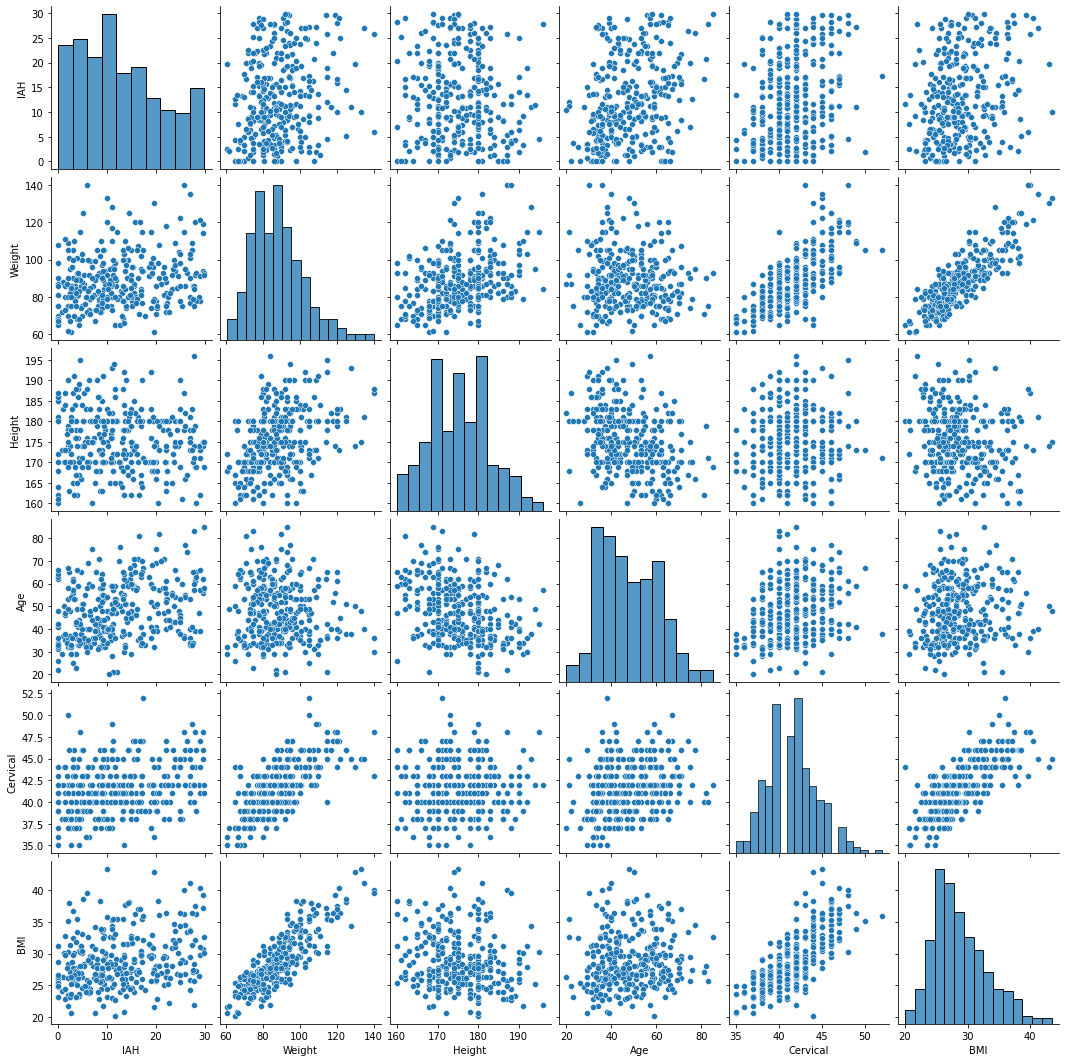

In [19]:
# Joint plot
sns.pairplot(df_OSA_male[['IAH', 'Weight', 'Height', 'Age', 'Cervical', 'BMI']])
plt.show()

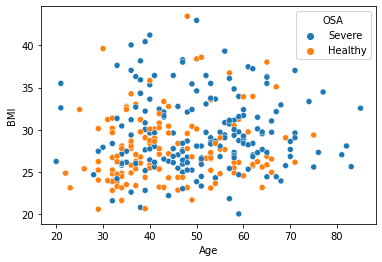

In [20]:
sns.scatterplot(data = df_OSA_male, x = df_OSA_male['Age'], y = df_OSA_male['BMI'], hue = "OSA")
plt.show()

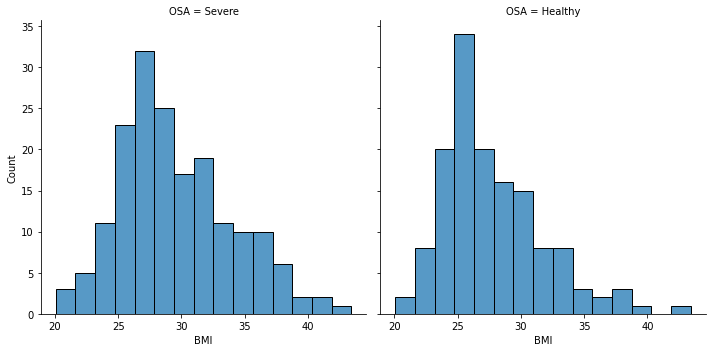

In [21]:
sns.displot(data = df_OSA_male, x = df_OSA_male['BMI'], col = "OSA")
plt.show()

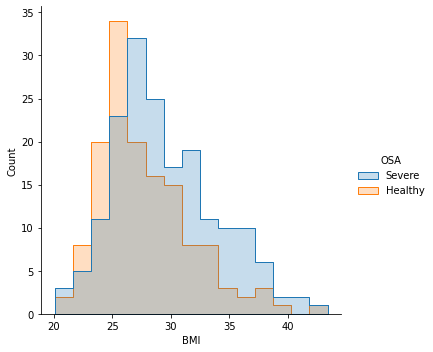

In [22]:
sns.displot(data = df_OSA_male, x = df_OSA_male['BMI'], hue = "OSA", element = "step")
plt.show()

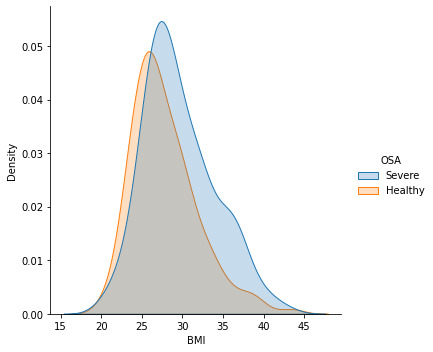

In [23]:
sns.displot(data = df_OSA_male, x = df_OSA_male['BMI'], hue = "OSA", kind = "kde", fill = True)
plt.show()

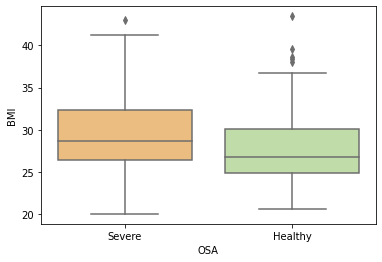

In [24]:
sns.boxplot(data = df_OSA_male, x = df_OSA_male['OSA'], y = df_OSA_male['BMI'], palette="Spectral")
plt.show()

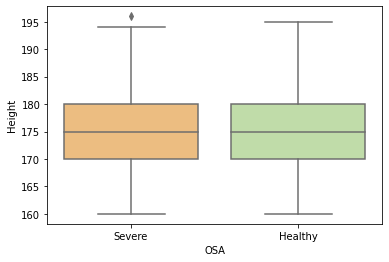

In [25]:
sns.boxplot(data = df_OSA_male, x = df_OSA_male['OSA'], y = df_OSA_male['Height'], palette="Spectral")
plt.show()

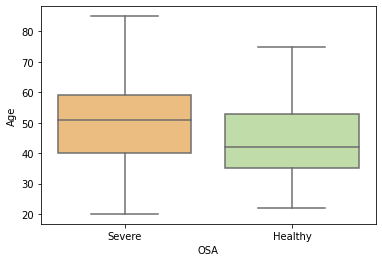

In [26]:
sns.boxplot(data = df_OSA_male, x = df_OSA_male['OSA'], y = df_OSA_male['Age'], palette="Spectral")
plt.show()